# Part 2 - Where to enrich? (what are study areas?)

## Enriching Study Areas
GeoEnrichment uses the concept of a study area to define the location of the point or area that you want to enrich with additional information or create reports about. The accepted forms of study areas are:
1. Street address locations
    - a. Single line input
    - b. Multiple field input
2. Point, line and polygon geometries 
3. Buffered study areas
4. Named statistical areas

Before we look at the exmaples of study areas, let's understand the concept of Data collections and analysis variables. We will look at Data collections in detail in a later section.

### Data collections and analysis variables
GeoEnrichment uses the concept of a data collection to define the data attributes (analysis variables) returned by the enrichment service. A data collection is a preassembled list of attributes that will be used to enrich the input features. Collection attributes can describe various types of information, such as demographic characteristics and geographic context of the locations or areas submitted as input features. We will introduce the concept of data collections here and look at the details in the next guide.

The `Country` class can be used to discover the data collections, sub-geographies and available reports for a country. When working with a particular country, you will find it convenient to get a reference to it using the Country.get() method. 

The `data_collections` property of a `Country` object lists a combination of available data collections and analysis variables for each data collection as a [Pandas](https://pandas.pydata.org/) dataframe. 

Once we know the data collection we would like to use, we can look at all the unique `analysisVariable`  available in that data collection.

In [1]:
# Import Libraries
from arcgis.gis import GIS
from arcgis.geoenrichment import Country, enrich, BufferStudyArea

In [2]:
# Create a GIS Connection
gis = GIS(profile="your_online_profile")

In [3]:
# Get US as a country
usa = Country.get("US")
type(usa)

arcgis.geoenrichment.enrichment.Country

In [4]:
df = usa.data_collections

# print a few rows of the DataFrame
df.head()

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
1yearincrements,1yearincrements.AGE0_CY,2024 Population Age <1,2024 Age: 1 Year Increments (Esri),2024
1yearincrements,1yearincrements.AGE1_CY,2024 Population Age 1,2024 Age: 1 Year Increments (Esri),2024
1yearincrements,1yearincrements.AGE2_CY,2024 Population Age 2,2024 Age: 1 Year Increments (Esri),2024
1yearincrements,1yearincrements.AGE3_CY,2024 Population Age 3,2024 Age: 1 Year Increments (Esri),2024
1yearincrements,1yearincrements.AGE4_CY,2024 Population Age 4,2024 Age: 1 Year Increments (Esri),2024


In [5]:
# call the shape property to get the total number of rows and columns
df.shape

(20837, 4)

Each data collection can have multiple analysis variables as seen in the table above. Every such analysis variable has a unique ID, found in the `analysisVariable` column. When calling the `enrich()` method, these analysis variables can be passed in the `data_collections` and `analysis_variables` parameters.

You can filter the `data_collections` and query the collections `analysis_variables` using Pandas expressions.

In [6]:
# get all the unique data collections available for the current country
df.index.unique()

Index(['1yearincrements', '5yearincrements', 'Age', 'agebyracebysex',
       'agebyracebysex2010', 'agebyracebysex2020', 'AgeDependency', 'AtRisk',
       'AutomobilesAutomotiveProducts', 'BabyProductsToysGames',
       ...
       'travelMPI', 'unitsinstructure', 'urbanizationgroupsNEW', 'vacant',
       'vehiclesavailable', 'veterans', 'Wealth', 'women', 'yearbuilt',
       'yearmovedin'],
      dtype='object', name='dataCollectionID', length=118)

The snippet below shows how you can query the `Age` data collection and get all the unique `analysisVariable`s under that collection.

In [7]:
df.loc["Age"]["analysisVariable"].unique()

array(['Age.MALE0', 'Age.MALE5', 'Age.MALE10', 'Age.MALE15', 'Age.MALE20',
       'Age.MALE25', 'Age.MALE30', 'Age.MALE35', 'Age.MALE40',
       'Age.MALE45', 'Age.MALE50', 'Age.MALE55', 'Age.MALE60',
       'Age.MALE65', 'Age.MALE70', 'Age.MALE75', 'Age.MALE80',
       'Age.MALE85', 'Age.FEM0', 'Age.FEM5', 'Age.FEM10', 'Age.FEM15',
       'Age.FEM20', 'Age.FEM25', 'Age.FEM30', 'Age.FEM35', 'Age.FEM40',
       'Age.FEM45', 'Age.FEM50', 'Age.FEM55', 'Age.FEM60', 'Age.FEM65',
       'Age.FEM70', 'Age.FEM75', 'Age.FEM80', 'Age.FEM85'], dtype=object)

In [8]:
# View a sample of the `Age` data collection
df.loc["Age"].head()

,analysisVariable,alias,fieldCategory,vintage
dataCollectionID,,,,
Age,Age.MALE0,2024 Males Age 0-4,2024 Age: 5 Year Increments (Esri),2024
Age,Age.MALE5,2024 Males Age 5-9,2024 Age: 5 Year Increments (Esri),2024
Age,Age.MALE10,2024 Males Age 10-14,2024 Age: 5 Year Increments (Esri),2024
Age,Age.MALE15,2024 Males Age 15-19,2024 Age: 5 Year Increments (Esri),2024
Age,Age.MALE20,2024 Males Age 20-24,2024 Age: 5 Year Increments (Esri),2024


Now, let's look at some examples of enriching each of the study areas.

### Enriching street address
Street address locations can be passed as strings of input street addresses, points of interest or place names. A street address can be passed as a single line or as a multiple field input. If a point (e.g. a street address) is used as a study area, the service will create a 1 mile ring buffer around the point to collect and append enrichment data. 

The example below uses a `street address` as a study area for enrichment using `Age` data collection.

#### Single line address

In [9]:
# Enriching single address as single line imput
single_address = enrich(
    study_areas=["380 New York St Redlands CA 92373"], data_collections=["Age"]
)

In [10]:
single_address

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,-117.19479,34.057265,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,377.0,373.0,338.0,349.0,278.0,241.0,178.0,124.0,110.0,"{""rings"": [[[-117.194790019279, 34.07177361177..."


##### Visualize results on a map

The returned spatial dataframe can be visualized on a map as shown below:

A buffer of 1 mile is created by default, as seen on this map, for any address.

In [ ]:
# Plot on a map
address_map = gis.map("Redlands, CA")
address_map

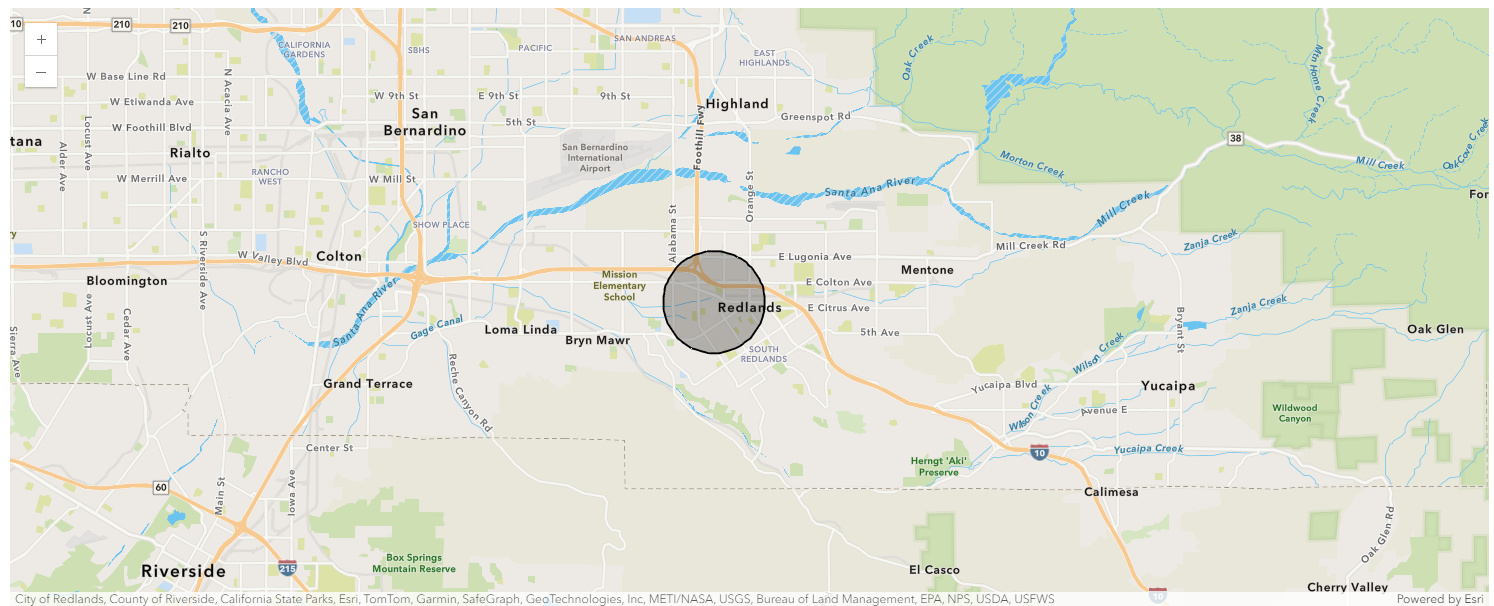

In [12]:
single_address.spatial.plot(address_map)

True

__Multiple addresses as single line input__

In [13]:
# Enriching multiple addresses as single line input
enrich(
    study_areas=[
        {
            "address": {
                "text": "12 Concorde Place Toronto ON M3C 3R8",
                "sourceCountry": "Canada",
            }
        },
        {
            "address": {
                "text": "380 New York St Redlands CA 92373",
                "sourceCountry": "USA",
            }
        },
    ],
    data_collections=["Age"],
)

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,...,ecypfa4549,ecypfa5054,ecypfa5559,ecypfa6064,ecypfa6569,ecypfa7074,ecypfa7579,ecypfa8084,ecypfa85_p,SHAPE
0,CAN,-79.328779,43.729724,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,-1.0,-1.0,...,1289.0,1304.0,1291.0,1301.0,1121.0,1077.0,944.0,733.0,940.0,"{""rings"": [[[-79.32877900047602, 43.7442083312..."
1,CAN,-117.19479,34.057265,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{""rings"": [[[-117.194790019279, 34.07177361177..."


#### Multiple field input

In [14]:
enrich(
    study_areas=[
        {
            "address": {
                "Address": "380 New York Street",
                "City": "Redlands",
                "Region": "CA",
                "Postal": 92373,
            }
        }
    ],
    data_collections=["Age"],
)

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,-117.19479,34.057265,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,377.0,373.0,338.0,349.0,278.0,241.0,178.0,124.0,110.0,"{""rings"": [[[-117.194790019279, 34.07177361177..."


Enriching with various analysis variables for age such as `FEM45, FEM50, FEM65` etc.

In [15]:
enrich(
    study_areas=["380 New York St Redlands CA 92373"],
    analysis_variables=["Age.FEM45", "Age.FEM55", "Age.FEM65"],
)

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,fem45,fem55,fem65,SHAPE
0,USA,-117.19479,34.057265,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,377.0,338.0,278.0,"{""rings"": [[[-117.194790019279, 34.07177361177..."


### Enriching point, line and polygon geometries

Point geometries can be passed as x and y coordinates to `study_areas` parameter. When points are specified as study areas, the service will analyze map areas surrounding or associated with the input point locations. Unless otherwise specified, the service will analyze a one mile ring around a point. This is also true for a line. Locations can also be given as polygon geometries.

#### Single Point described as map coordinates

In [16]:
from arcgis.geometry import Point

In [17]:
pt = Point({"x": -117.1956, "y": 34.0572, "spatialReference": {"wkid": 4326}})
enrich(study_areas=[pt], data_collections=["Age"])

,source_country,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,431.0,...,361.0,357.0,324.0,335.0,266.0,230.0,170.0,118.0,106.0,"{""rings"": [[[-117.19559999999998, 34.071708616..."


#### Multiple points with attributes described as map coordinates

In [18]:
pt1 = Point({"x": -122.435, "y": 37.785, "spatialReference": {"wkid": 4326}})
pt2 = Point({"x": -122.433, "y": 37.734, "spatialReference": {"wkid": 4326}})

enrich(study_areas=[pt1, pt2], data_collections=["Age"])

,source_country,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,1877.0,...,2554.0,2365.0,2135.0,1942.0,2026.0,2047.0,1865.0,1432.0,2104.0,"{""rings"": [[[-122.43499999999999, 37.799499596..."
1,USA,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,1473.0,...,2136.0,2091.0,1799.0,1784.0,1728.0,1546.0,1219.0,758.0,909.0,"{""rings"": [[[-122.43299999999999, 37.748499722..."


#### Line feature described as geometry

In [19]:
from arcgis.geometry import Polyline

In [20]:
line = Polyline(
    {
        "paths": [[[-13048580, 4036370], [-13046151, 4036366]]],
        "spatialReference": {"wkid": 102100},
    }
)
enriched_line_df = enrich(study_areas=[line], data_collections=["Age"])

In [21]:
enriched_line_df

,source_country,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,RingBuffer,esriMiles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,652.0,...,590.0,570.0,508.0,514.0,442.0,379.0,282.0,196.0,269.0,"{""rings"": [[[-13048577.024670875, 4038319.6115..."


##### Visualize results on a map

The returned spatial dataframe can be visualized on a map as shown below:

In [ ]:
# Plot on a map
line_map = gis.map("Redlands, CA")
line_map

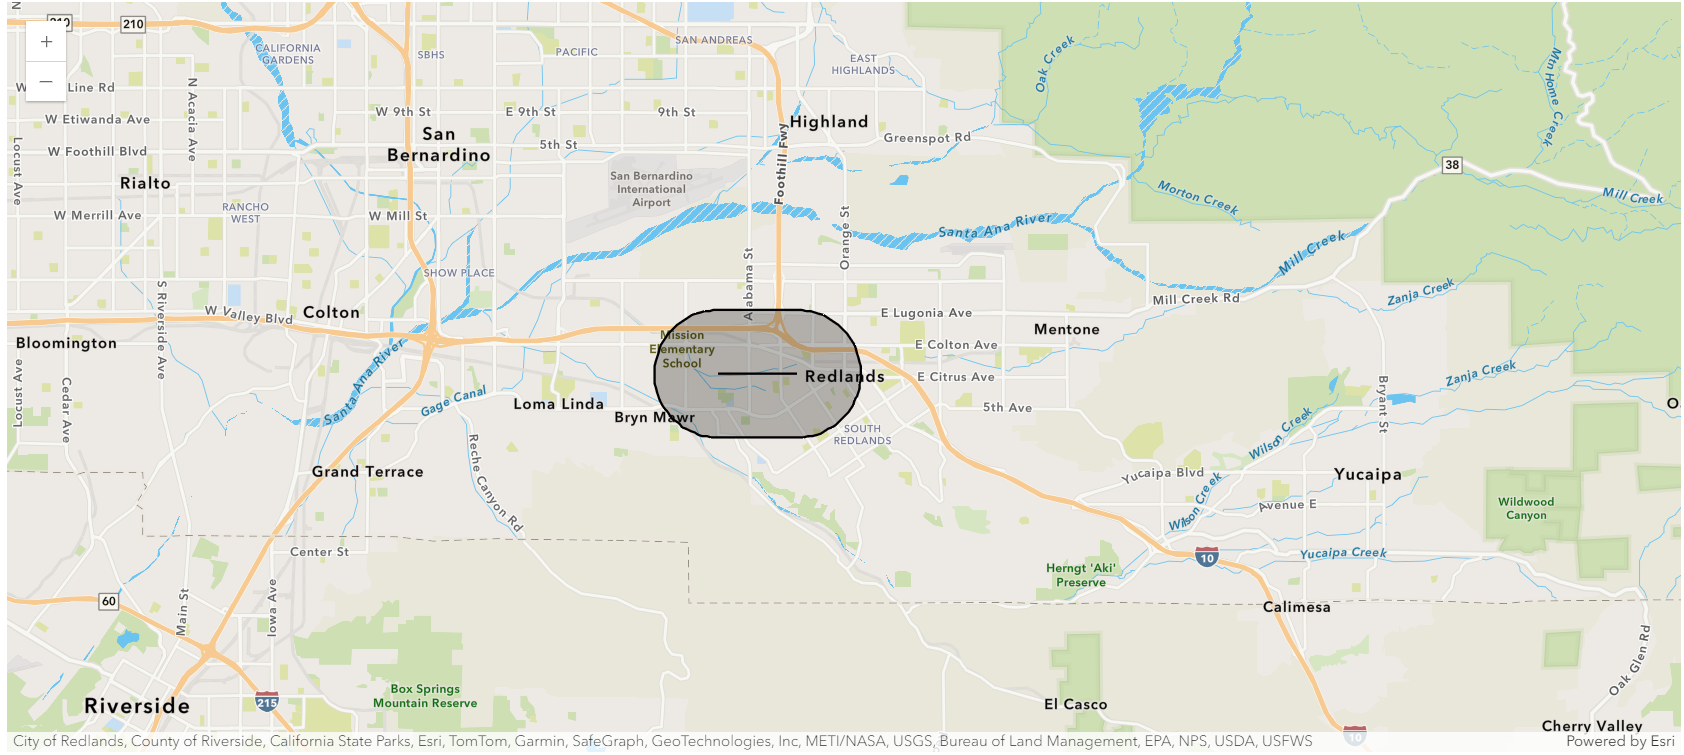

We can clearly see the line and a 1 mile buffer around the line in this map

In [23]:
# Draw line
line_map.content.draw(line)

# Plot enriched area around line
enriched_line_df.spatial.plot(line_map)

True

#### Map area described as polygons

In [26]:
from arcgis.geometry import Polygon

In [27]:
poly = Polygon(
    {
        "rings": [
            [
                [-117.185412, 34.063170],
                [-122.81, 37.81],
                [-117.200570, 34.057196],
                [-117.185412, 34.063170],
            ]
        ],
        "spatialReference": {"wkid": 4326},
    }
)

enrich(study_areas=[poly], data_collections=["Age"])

,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,male5,male10,male15,male20,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,4470.0,4686.0,5116.0,5448.0,5218.0,...,3957.0,3951.0,3652.0,3484.0,2929.0,2214.0,1647.0,971.0,1083.0,"{""rings"": [[[-117.20057, 34.057196], [-122.809..."


### Enriching Buffered study areas

`BufferStudyArea` instances are used to change the ring buffer size or create drive-time service areas around points specified using one of the above methods. BufferStudyArea allows you to buffer point and street address study areas. They can be created using the following parameters:
        * area: the point geometry or street address (string) study area to be buffered
        * radii: list of distances by which to buffer the study area, eg. [1, 2, 3]
        * units: distance unit, eg. Miles, Kilometers, Minutes (when using drive times/travel_mode)
        * overlap: boolean, uses overlapping rings/network service areas when True, or non-overlapping disks when False
        * travel_mode: None or string, one of the supported travel modes when using network service areas
        

`BufferStudyArea` also allows you to define drive time service areas around points as well as other advanced service areas such as walking and trucking.

#### Buffering location using driving distance 

The example below creates disks of radii 1, 3 and 5 Miles respectively from a street address and enriches these using the 'Age' data collection.

In [28]:
buffered = BufferStudyArea(
    area="380 New York St Redlands CA 92373",
    radii=[1, 3, 5],
    units="Miles",
    overlap=False,
)
drive_dist_df = enrich(study_areas=[buffered], data_collections=["Age"])

In [29]:
drive_dist_df

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,-117.19479,34.057265,RingBuffer,Miles,Miles,1.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,377.0,373.0,338.0,349.0,278.0,241.0,178.0,124.0,110.0,"{""rings"": [[[-117.194790019279, 34.07177361177..."
1,USA,-117.19479,34.057265,RingBuffer,Miles,Miles,3.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,2370.0,2365.0,2175.0,2267.0,2199.0,1862.0,1475.0,1048.0,1342.0,"{""rings"": [[[-117.194790019279, 34.10079074081..."
2,USA,-117.19479,34.057265,RingBuffer,Miles,Miles,5.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,4877.0,4929.0,4597.0,4819.0,4498.0,3611.0,2782.0,1874.0,2308.0,"{""rings"": [[[-117.194790019279, 34.12980773254..."


##### Visualize results on a map

The returned spatial dataframe can be visualized on a map as shown below:

In [ ]:
# Plot on a map
buffer_map1 = gis.map("Redlands, CA")
buffer_map1.basemap.basemap = "dark-gray-vector"
buffer_map1

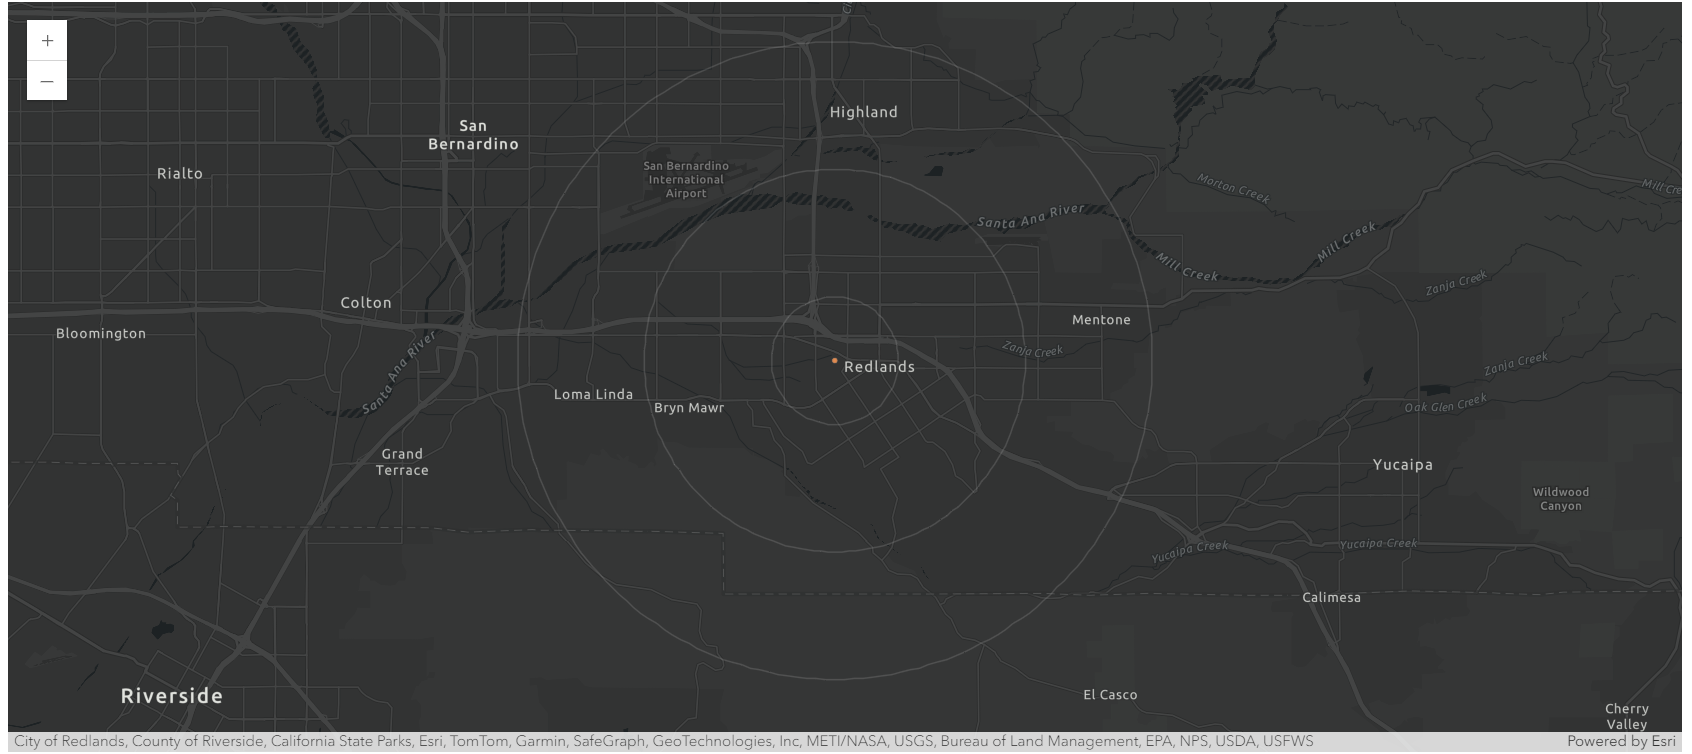

In [31]:
drive_dist_df.spatial.plot(map_widget=buffer_map1)

True

In [35]:
renderer_manager = buffer_map1.content.renderer(0)
smart_mapping_manager = renderer_manager.smart_mapping()
smart_mapping_manager.class_breaks_renderer(
    break_type="size",
    classification_method="esriClassifyNaturalBreaks",
    num_classes=4,
    field="buffer_radii",
)

#### Buffering location using drive times

The example below creates 5 and 10 minute drive times from a street address and enriches these using the 'Age' data collection.

In [36]:
buffered = BufferStudyArea(
    area="380 New York St Redlands CA 92373",
    radii=[5, 10],
    units="Minutes",
    travel_mode="Driving",
)
drive_time_df = enrich(study_areas=[buffered], data_collections=["Age"])

In [37]:
drive_time_df

,source_country,x,y,area_type,buffer_units,buffer_units_alias,buffer_radii,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,USA,-117.19479,34.057265,NetworkServiceArea,Minutes,Drive Time Minutes,5.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,147.0,139.0,129.0,122.0,108.0,85.0,62.0,47.0,35.0,"{""rings"": [[[-117.19119993574638, 34.070580218..."
1,USA,-117.19479,34.057265,NetworkServiceArea,Minutes,Drive Time Minutes,10.0,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,...,1864.0,1833.0,1688.0,1742.0,1663.0,1439.0,1160.0,846.0,1137.0,"{""rings"": [[[-117.20063220311049, 34.118190709..."


##### Visualize results on a map

The returned spatial dataframe can be visualized on a map as shown below:

In [ ]:
# Plot on a map
buffer_map2 = gis.map("Redlands, CA")
buffer_map2.basemap.basemap = "gray-vector"
buffer_map2

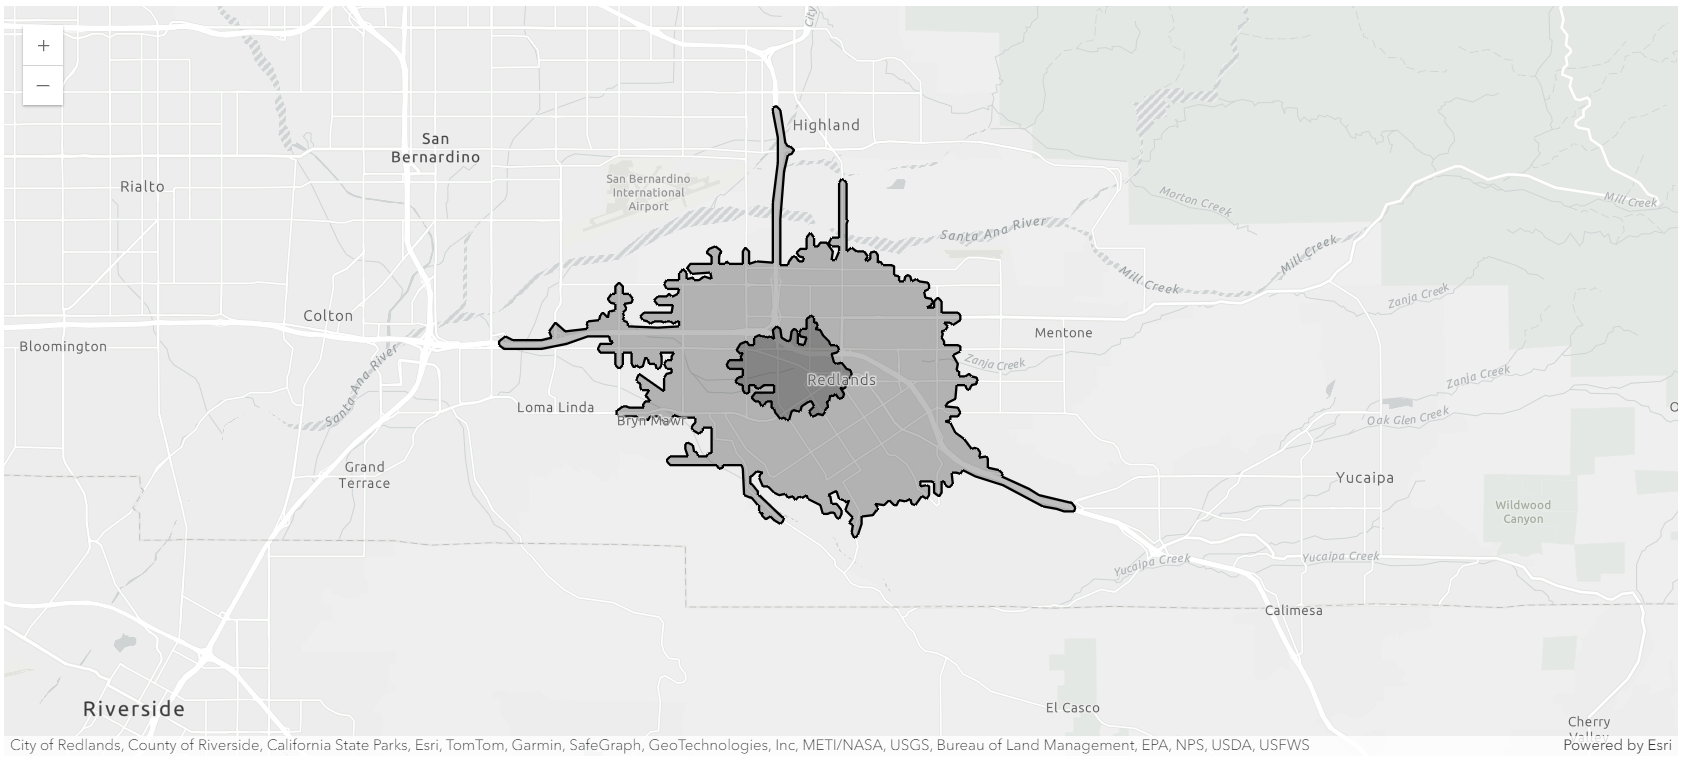

In [43]:
drive_time_df.spatial.plot(map_widget=buffer_map2)

True

In [44]:
renderer_manager = buffer_map1.content.renderer(0)
smart_mapping_manager = renderer_manager.smart_mapping()
smart_mapping_manager.class_breaks_renderer(
    break_type="size",
    classification_method="esriClassifyNaturalBreaks",
    num_classes=3,
    field="buffer_radii",
)

### Enriching a named statistical area

In all previous examples of different study area types, locations were defined as either points or polygons. Study area locations can also be passed as one or many named statistical areas. This form of study area lets you define an area as a standard geographic statistical feature, such as a census or postal area, for example, to obtain enrichment information for a U.S. state, county, or ZIP Code or a Canadian province or postal code. We will explore Named statistical areas in detail in the next section.


#### Enriching a zip code
Enriching zip code 92373 in California using the 'Age' data collection:

In [45]:
usa = Country.get("US")

In [46]:
redlands = usa.subgeographies.states["California"].zip5["92373"]

In [47]:
type(redlands)

arcgis.geoenrichment.enrichment.NamedArea

In [48]:
redlands

<NamedArea name:"United States" area_id="92373", level="US.ZIP5", country="United States">

In [49]:
redlands_df = enrich(study_areas=[redlands], data_collections=["Age"])

In [50]:
redlands_df

,std_geography_level,std_geography_name,std_geography_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,male5,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,US.ZIP5,Redlands,92373,USA,Query:US.ZIP5,2.191,2.576,1,934.0,941.0,...,1042.0,1037.0,1011.0,1114.0,1079.0,976.0,812.0,589.0,903.0,"{""rings"": [[[-117.22586490027774, 34.063118499..."



##### Visualize results on a map

The returned spatial dataframe can be visualized on a map as shown below:

In [ ]:
zip_map = gis.map("Redlands, CA")
zip_map

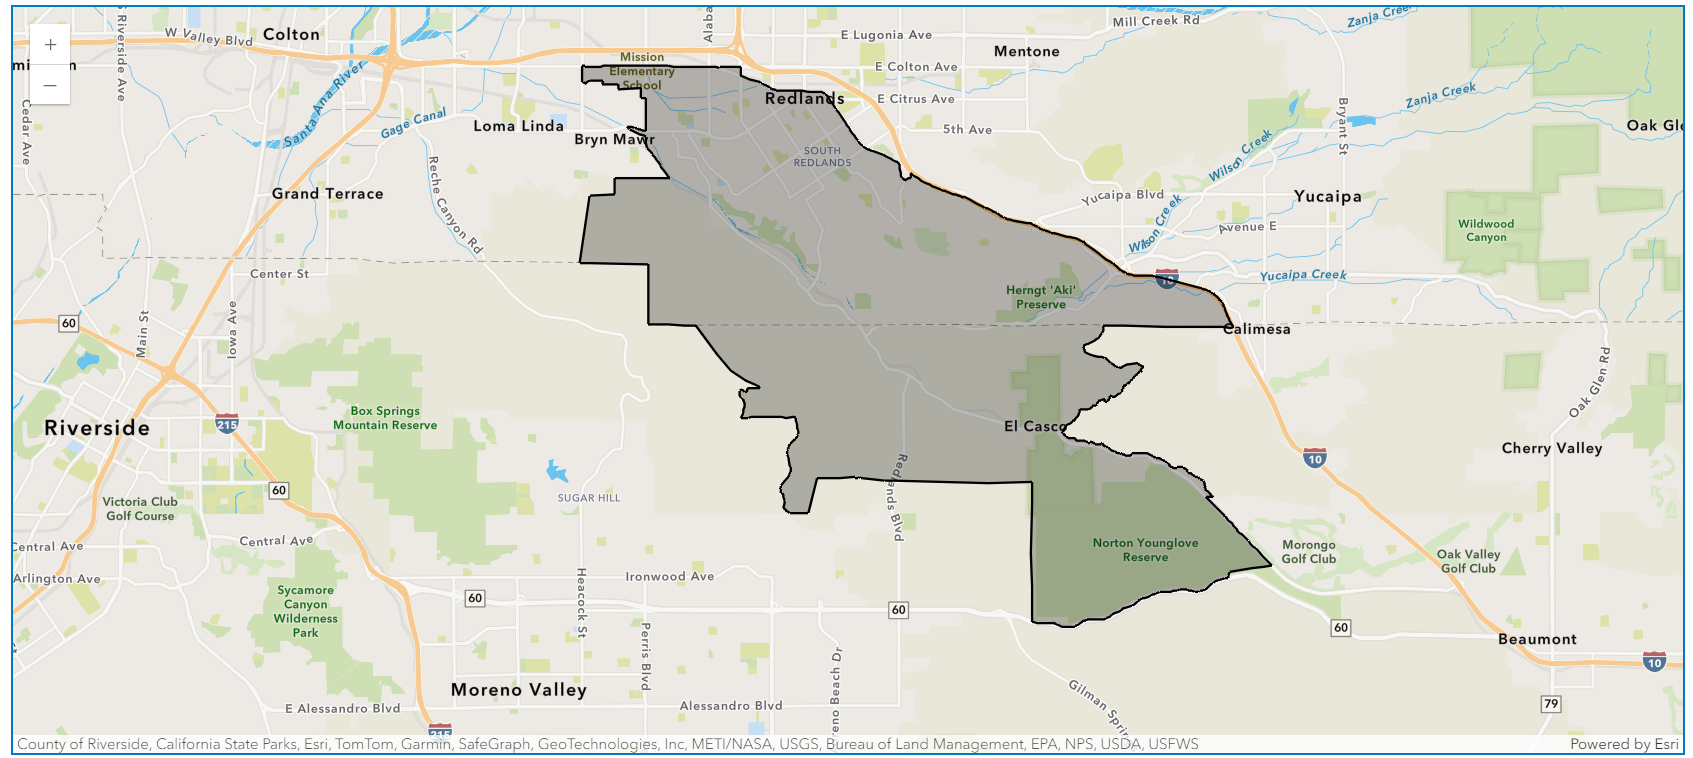

In [52]:
redlands_df.spatial.plot(zip_map)

True

#### Enriching all counties in a state

##### Note: When getting NamedAreas in general a dictionary is returned. In this case, you can either pass in the dictionary as a variable to the study_areas parameter or a list of the dictionary values.   
Here is an example of each case:

In [53]:
ca_counties = usa.subgeographies.states["California"].counties

In [54]:
counties_df = enrich(study_areas=ca_counties, data_collections=["Age"])
counties_df.head()

,std_geography_level,std_geography_name,std_geography_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,male5,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,US.Counties,Alameda County,06001,USA,Query:US.Counties,2.191,2.576,1,44824.0,48073.0,...,56639.0,54055.0,47866.0,47263.0,42287.0,35486.0,27541.0,16979.0,19724.0,"{""rings"": [[[-122.27035527207462, 37.904393925..."
1,US.Counties,Alpine County,06003,USA,Query:US.Counties,2.191,2.576,1,24.0,29.0,...,21.0,42.0,39.0,49.0,56.0,46.0,35.0,14.0,12.0,"{""rings"": [[[-119.90363131904053, 38.932852667..."
2,US.Counties,Amador County,06005,USA,Query:US.Counties,2.191,2.576,1,902.0,956.0,...,939.0,1002.0,1267.0,1692.0,1842.0,1750.0,1361.0,723.0,706.0,"{""rings"": [[[-120.0776487553579, 38.7088870601..."
3,US.Counties,Butte County,06007,USA,Query:US.Counties,2.191,2.576,1,5545.0,5680.0,...,5181.0,5211.0,5581.0,6477.0,6769.0,5871.0,4424.0,2696.0,2904.0,"{""rings"": [[[-121.4046210002662, 40.1466410002..."
4,US.Counties,Calaveras County,06009,USA,Query:US.Counties,2.191,2.576,1,1038.0,1157.0,...,1035.0,1259.0,1592.0,2075.0,2284.0,1910.0,1562.0,823.0,700.0,"{""rings"": [[[-120.07246099986347, 38.509088000..."


In [55]:
counties_df2 = usa.enrich(
    study_areas=list(ca_counties.values()), data_collections=["transportation"]
)
counties_df2.head()

,std_geography_level,std_geography_name,std_geography_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,x6001_x,x6001_a,...,x6061fy_x,x6061fy_a,x6061fy_i,x6062fy_x,x6062fy_a,x6062fy_i,x6063fy_x,x6063fy_a,x6063fy_i,SHAPE
0,US.Counties,Alameda County,06001,USA,Query:US.Counties,2.191,2.576,1,9462241193.0,16064.93,...,108408771.0,182.61,239.0,112247724.0,189.07,196.0,6069755.0,10.22,237.0,"{""rings"": [[[-122.27035527207462, 37.904393925..."
1,US.Counties,Alpine County,06003,USA,Query:US.Counties,2.191,2.576,1,7733695.0,14455.51,...,17780.0,32.68,43.0,53174.0,97.75,101.0,1152.0,2.12,49.0,"{""rings"": [[[-119.90363131904053, 38.932852667..."
2,US.Counties,Amador County,06005,USA,Query:US.Counties,2.191,2.576,1,192743740.0,11858.96,...,989308.0,58.84,77.0,1478196.0,87.92,91.0,60066.0,3.57,83.0,"{""rings"": [[[-120.0776487553579, 38.7088870601..."
3,US.Counties,Butte County,06007,USA,Query:US.Counties,2.191,2.576,1,837449850.0,10180.4,...,5220830.0,63.77,83.0,7537237.0,92.07,96.0,289589.0,3.54,82.0,"{""rings"": [[[-121.4046210002662, 40.1466410002..."
4,US.Counties,Calaveras County,06009,USA,Query:US.Counties,2.191,2.576,1,238586398.0,12471.85,...,1030039.0,52.99,69.0,1705437.0,87.74,91.0,66357.0,3.41,79.0,"{""rings"": [[[-120.07246099986347, 38.509088000..."


##### Visualize results on a map

In [ ]:
county_map = gis.map("California")
county_map

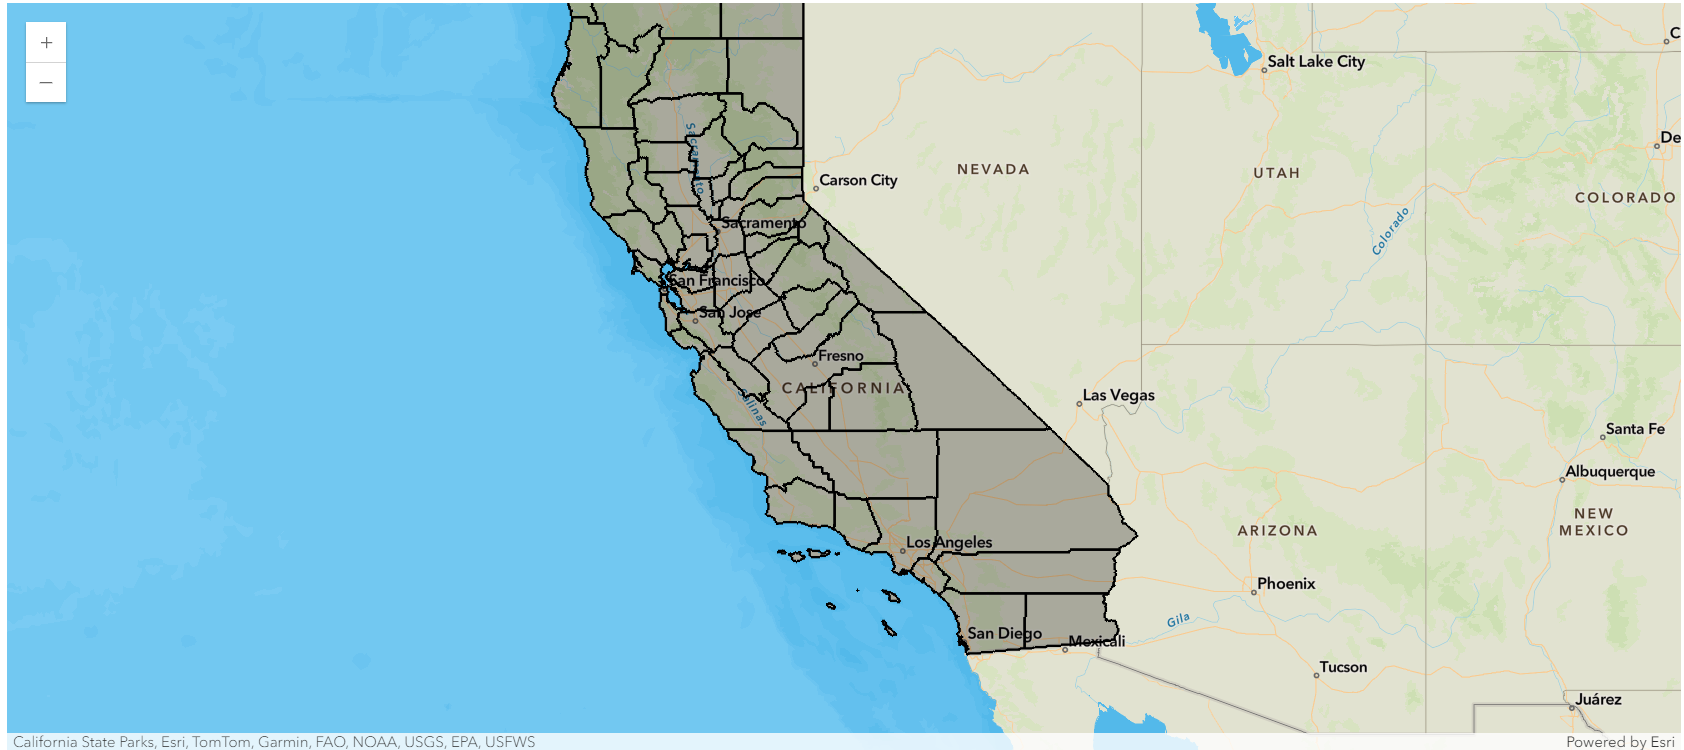

In [57]:
counties_df.spatial.plot(map_widget=county_map)

True

In [52]:
county_map.legend.enabled = True

## Conclusion

In this part of the `arcgis.geoenrichment` module guide series, you were introduced to the concept of study areas and how Geoenrichment uses a study area to define the location of the point, polyline or area that you want to enrich. You have also seen in detail how different types of study areas can be enriched and visualized on a map.

In the subsequent pages, you will learn about:
1. Exploring Named Statistical Areas (explains where to enrich continued)
2. Data Collections and GeoEnrichment coverage (explains what datasets/variables to enrich with)
3. Generating Reports
4. Standard Geography Queries